In [1]:
# dual_autodiff.ipynb

import timeit
import matplotlib.pyplot as plt

# Import the pure Python Dual class
from dual_autodiff.dual import Dual as Dual_Python

# Import the Cythonized Dual class
from dual_autodiff_x.dual import Dual as Dual_Cython

In [2]:
# Number of operations to benchmark
n_operations = 100000

def pure_python_operations(n):
    x = Dual_Python(1.0, 1.0)
    y = Dual_Python(2.0, 2.0)
    for _ in range(n):
        z = x + y
        w = x * y

def cython_operations(n):
    x = Dual_Cython(1.0, 1.0)
    y = Dual_Cython(2.0, 2.0)
    for _ in range(n):
        z = x + y
        w = x * y

In [3]:
pure_times = []
cython_times = []

In [4]:
# Define the number of runs for averaging
n_runs = 10

# Benchmark Pure Python Version
pure_time = timeit.timeit('pure_python_operations(n_operations)', 
                          globals=globals(), 
                          number=n_runs)

# Benchmark Cythonized Version
cython_time = timeit.timeit('cython_operations(n_operations)', 
                            globals=globals(), 
                            number=n_runs)

print(f"Pure Python Time: {pure_time:.4f} seconds for {n_operations} operations over {n_runs} runs")
print(f"Cythonized Time: {cython_time:.4f} seconds for {n_operations} operations over {n_runs} runs")

Pure Python Time: 4.9077 seconds for 100000 operations over 10 runs
Cythonized Time: 1.5109 seconds for 100000 operations over 10 runs


In [5]:
# Define a range of operation counts
operation_counts = [1000, 5000, 10000, 50000, 100000, 500000]

In [6]:
for n in operation_counts:
    # Time Pure Python version
    pt = timeit.timeit('pure_python_operations(n)', 
                       globals=globals(), 
                       number=5)  # Fewer runs for smaller n
    
    # Time Cythonized version
    ct = timeit.timeit('cython_operations(n)', 
                       globals=globals(), 
                       number=5)
    
    pure_times.append(pt)
    cython_times.append(ct)
    
    print(f"n={n}: Pure Python={pt:.4f}s, Cythonized={ct:.4f}s")
 

n=1000: Pure Python=0.0188s, Cythonized=0.0078s
n=5000: Pure Python=0.1078s, Cythonized=0.0406s
n=10000: Pure Python=0.1653s, Cythonized=0.0873s
n=50000: Pure Python=0.8434s, Cythonized=0.3721s
n=100000: Pure Python=1.5851s, Cythonized=0.7588s
n=500000: Pure Python=9.9672s, Cythonized=4.1649s


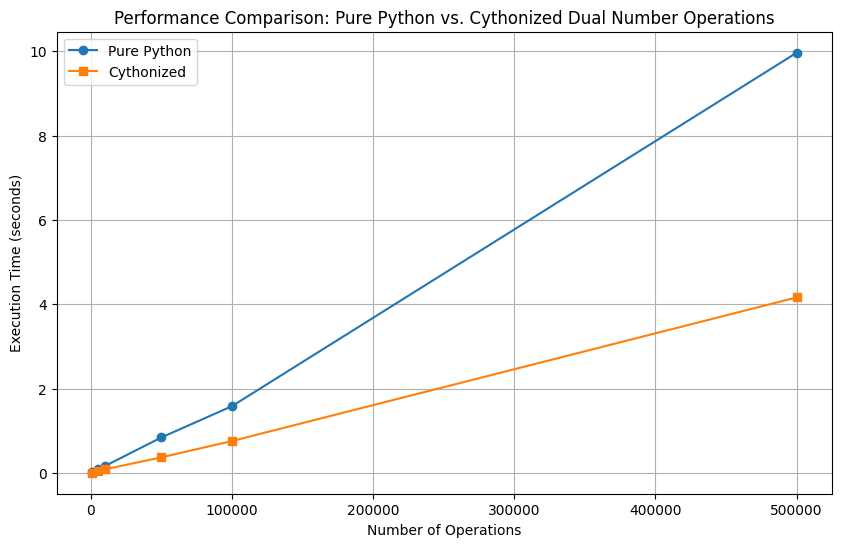

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(operation_counts, pure_times, label='Pure Python', marker='o')
plt.plot(operation_counts, cython_times, label='Cythonized', marker='s')
plt.xlabel('Number of Operations')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison: Pure Python vs. Cythonized Dual Number Operations')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
speedup_factors = [pure / cython for pure, cython in zip(pure_times, cython_times)]

for n, speedup in zip(operation_counts, speedup_factors):
    print(f"n={n}: Cythonized is {speedup:.2f} times faster than Pure Python")

n=1000: Cythonized is 2.41 times faster than Pure Python
n=5000: Cythonized is 2.65 times faster than Pure Python
n=10000: Cythonized is 1.89 times faster than Pure Python
n=50000: Cythonized is 2.27 times faster than Pure Python
n=100000: Cythonized is 2.09 times faster than Pure Python
n=500000: Cythonized is 2.39 times faster than Pure Python
